In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
import hark_portfolio_agents as hpa
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r=1, fm=None, market=None, dphm=1500):
    #initialize population
    pop = hpa.AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    #initialize the financial model
    fm = hpa.FinanceModel() if fm is None else fm
    
    fm.calculate_risky_expectations()
    agent_parameters.update(fm.risky_expectations())
    
    #initialize population model
    pop.init_simulation()
    
    attsim = hpa.AttentionSimulation(pop, fm, a=a, q=q, r=r, market=market, dphm=dphm)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

In [4]:
#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

In [5]:
market = hpa.MarketPNL(
   seed_limit = 150
)

config_file: ../PNL/macroliquidity.ini
config_local_file: ../PNL/macroliquidity_local.ini


In [6]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 10, a=0.2, q=8, r=12, dphm=7500, market= market)

Q-0
Output for S:10,BL:0,SL:0 already exists.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD119BL0SL56.csv
Output for S:119,BL:0,SL:56 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 100
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD100BL1SL24.csv


NL model: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
NL model loaded
SETTING: SEED:=100
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=24
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD100BL1SL24.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==100.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==24.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: De

Elapsed (sys clock), run 100:  44.58914132299999

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD100BL1SL24.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD18BL0SL79.csv
Output for S:18,BL:0,SL:79 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 80
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD80BL0SL29.csv


NL model loaded
SETTING: SEED:=80
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=29
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD80BL0SL29.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==80.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==29.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 80:  31.122957776999996

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD80BL0SL29.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD27BL42SL10.csv
Output for S:27,BL:42,SL:10 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD22BL0SL82.csv
Output for S:22,BL:0,SL:82 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 98
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD98BL0SL37.csv


NL model loaded
SETTING: SEED:=98
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=37
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD98BL0SL37.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==98.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==37.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 98:  28.868997008000008

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD98BL0SL37.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 76
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD76BL0SL14.csv


NL model loaded
SETTING: SEED:=76
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=14
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD76BL0SL14.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==76.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==14.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 76:  29.014920645000018

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD76BL0SL14.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD65BL36SL72.csv
Output for S:65,BL:36,SL:72 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD40BL10SL180.csv
Output for S:40,BL:10,SL:180 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD7BL8SL3.csv
Output for S:7,BL:8,SL:3 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 138
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Q-1
Testing for blob existence: pnl/LMtransactions_SD138BL2SL27.csv


NL model loaded
SETTING: SEED:=138
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=2
SETTING: BkrSel_Limit:=27
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD138BL2SL27.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==138.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==2.0
REPORTING: BkrSel_Limit==27.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 138:  29.284923823000014

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD138BL2SL27.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD6BL14SL138.csv
Output for S:6,BL:14,SL:138 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD40BL14SL62.csv
Output for S:40,BL:14,SL:62 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD7BL43SL57.csv
Output for S:7,BL:43,SL:57 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 134
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD134BL9SL13.csv


NL model loaded
SETTING: SEED:=134
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=9
SETTING: BkrSel_Limit:=13
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD134BL9SL13.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==134.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==9.0
REPORTING: BkrSel_Limit==13.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 134:  29.163218409999985

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD134BL9SL13.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 137
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD137BL93SL0.csv


NL model loaded
SETTING: SEED:=137
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=93
SETTING: BkrSel_Limit:=0
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD137BL93SL0.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==137.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==93.0
REPORTING: BkrSel_Limit==0.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 137:  29.214979772999982

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD137BL93SL0.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD37BL19SL64.csv
Output for S:37,BL:19,SL:64 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD27BL21SL31.csv
Output for S:27,BL:21,SL:31 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD5BL14SL48.csv
Output for S:5,BL:14,SL:48 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD73BL33SL25.csv
Output for S:73,BL:33,SL:25 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 101
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD101BL39SL59.csv


NL model loaded
SETTING: SEED:=101
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=39
SETTING: BkrSel_Limit:=59
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD101BL39SL59.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==101.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==39.0
REPORTING: BkrSel_Limit==59.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 101:  28.956864548

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD101BL39SL59.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD18BL71SL2.csv
Output for S:18,BL:71,SL:2 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 132
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Q-2
Testing for blob existence: pnl/LMtransactions_SD132BL8SL71.csv


NL model loaded
SETTING: SEED:=132
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=8
SETTING: BkrSel_Limit:=71
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD132BL8SL71.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==132.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==8.0
REPORTING: BkrSel_Limit==71.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 132:  29.26499386100005

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD132BL8SL71.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 125
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD125BL98SL33.csv


NL model loaded
SETTING: SEED:=125
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=98
SETTING: BkrSel_Limit:=33
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD125BL98SL33.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==125.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==98.0
REPORTING: BkrSel_Limit==33.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 125:  29.140163539000014

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD125BL98SL33.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 109
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD109BL16SL0.csv


NL model loaded
SETTING: SEED:=109
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=16
SETTING: BkrSel_Limit:=0
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD109BL16SL0.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==109.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==16.0
REPORTING: BkrSel_Limit==0.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 109:  29.02676964699998

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD109BL16SL0.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD62BL81SL39.csv
Output for S:62,BL:81,SL:39 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 80
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD80BL361SL7.csv


NL model loaded
SETTING: SEED:=80
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=361
SETTING: BkrSel_Limit:=7
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD80BL361SL7.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==80.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==361.0
REPORTING: BkrSel_Limit==7.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 80:  29.22114423900001

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD80BL361SL7.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 113
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD113BL107SL7.csv


NL model loaded
SETTING: SEED:=113
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=107
SETTING: BkrSel_Limit:=7
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL107SL7.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==113.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==107.0
REPORTING: BkrSel_Limit==7.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 113:  29.378684007000004

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL107SL7.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD26BL204SL0.csv
Output for S:26,BL:204,SL:0 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD55BL30SL17.csv
Output for S:55,BL:30,SL:17 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD21BL73SL32.csv
Output for S:21,BL:73,SL:32 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 62
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD62BL199SL94.csv


NL model loaded
SETTING: SEED:=62
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=199
SETTING: BkrSel_Limit:=94
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD62BL199SL94.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==62.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==199.0
REPORTING: BkrSel_Limit==94.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 62:  28.51797764600002

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD62BL199SL94.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD67BL0SL82.csv
Output for S:67,BL:0,SL:82 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 90
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD90BL4SL26.csv


NL model loaded
SETTING: SEED:=90
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=4
SETTING: BkrSel_Limit:=26
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD90BL4SL26.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==90.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==4.0
REPORTING: BkrSel_Limit==26.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 90:  29.215835129000027

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD90BL4SL26.csv
Checking for existence.
Does not exist. Uploading.
Q-3
Testing for blob existence: pnl/LMtransactions_SD60BL19SL65.csv


Sim ID (SEED): 60
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Elapsed (sys clock), run 60:  29.133252916999993

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD60BL19SL65.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD1BL0SL88.csv
Output for S:1,BL:0,SL:88 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 91
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD91BL9SL9.csv


NL model loaded
SETTING: SEED:=91
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=9
SETTING: BkrSel_Limit:=9
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD91BL9SL9.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==91.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==9.0
REPORTING: BkrSel_Limit==9.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPORTIN

Elapsed (sys clock), run 91:  29.034781186000032

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD91BL9SL9.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 105
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD105BL78SL386.csv


NL model loaded
SETTING: SEED:=105
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=78
SETTING: BkrSel_Limit:=386
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD105BL78SL386.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==105.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==78.0
REPORTING: BkrSel_Limit==386.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 105:  29.124252244000104

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD105BL78SL386.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 130
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD130BL23SL34.csv


NL model loaded
SETTING: SEED:=130
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=23
SETTING: BkrSel_Limit:=34
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD130BL23SL34.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==130.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==23.0
REPORTING: BkrSel_Limit==34.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 130:  29.352839956000025

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD130BL23SL34.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 100
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD100BL0SL125.csv


NL model loaded
SETTING: SEED:=100
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=125
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD100BL0SL125.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==100.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==125.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 100:  28.841246827999953

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD100BL0SL125.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD9BL189SL52.csv
Output for S:9,BL:189,SL:52 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 98
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD98BL0SL22.csv


NL model loaded
SETTING: SEED:=98
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=22
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD98BL0SL22.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==98.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==22.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 98:  28.691541409000024

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD98BL0SL22.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 92
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD92BL116SL8.csv


NL model loaded
SETTING: SEED:=92
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=116
SETTING: BkrSel_Limit:=8
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD92BL116SL8.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==92.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==116.0
REPORTING: BkrSel_Limit==8.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 92:  28.90131183699998

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD92BL116SL8.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 113
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD113BL3SL25.csv


NL model loaded
SETTING: SEED:=113
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=3
SETTING: BkrSel_Limit:=25
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL3SL25.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==113.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==3.0
REPORTING: BkrSel_Limit==25.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 113:  29.051229682999974

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL3SL25.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 85
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD85BL61SL121.csv


NL model loaded
SETTING: SEED:=85
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=61
SETTING: BkrSel_Limit:=121
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL61SL121.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==85.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==61.0
REPORTING: BkrSel_Limit==121.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 85:  28.743413927999995

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL61SL121.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 81
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD81BL0SL6.csv


NL model loaded
SETTING: SEED:=81
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=6
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL0SL6.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==81.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==6.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPORTIN

Elapsed (sys clock), run 81:  29.57928920100005

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL0SL6.csv
Checking for existence.
Does not exist. Uploading.
Q-4
Testing for blob existence: pnl/LMtransactions_SD14BL182SL25.csv
Output for S:14,BL:182,SL:25 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 113
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD113BL75SL66.csv


NL model loaded
SETTING: SEED:=113
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=75
SETTING: BkrSel_Limit:=66
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL75SL66.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==113.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==75.0
REPORTING: BkrSel_Limit==66.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 113:  28.82444642200005

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL75SL66.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD34BL1SL0.csv
Output for S:34,BL:1,SL:0 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD14BL20SL8.csv
Output for S:14,BL:20,SL:8 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD12BL0SL21.csv
Output for S:12,BL:0,SL:21 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 37
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD37BL341SL122.csv


NL model loaded
SETTING: SEED:=37
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=341
SETTING: BkrSel_Limit:=122
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD37BL341SL122.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==37.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==341.0
REPORTING: BkrSel_Limit==122.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 37:  29.04242101500006

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD37BL341SL122.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 88
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD88BL0SL70.csv


NL model loaded
SETTING: SEED:=88
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=70
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD88BL0SL70.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==88.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==70.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 88:  29.298590751999996

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD88BL0SL70.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD35BL5SL13.csv
Output for S:35,BL:5,SL:13 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 85
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD85BL23SL9.csv


NL model loaded
SETTING: SEED:=85
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=23
SETTING: BkrSel_Limit:=9
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL23SL9.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==85.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==23.0
REPORTING: BkrSel_Limit==9.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 85:  29.536905825999952

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD85BL23SL9.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD52BL128SL19.csv
Output for S:52,BL:128,SL:19 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD24BL180SL36.csv
Output for S:24,BL:180,SL:36 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 113
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD113BL43SL5.csv


NL model loaded
SETTING: SEED:=113
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=43
SETTING: BkrSel_Limit:=5
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL43SL5.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==113.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==43.0
REPORTING: BkrSel_Limit==5.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 113:  28.805748260999962

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD113BL43SL5.csv
Checking for existence.
Does not exist. Uploading.
Q-5
Testing for blob existence: pnl/LMtransactions_SD59BL1SL3.csv
Output for S:59,BL:1,SL:3 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 129
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD129BL251SL16.csv


NL model loaded
SETTING: SEED:=129
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=251
SETTING: BkrSel_Limit:=16
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD129BL251SL16.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==129.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==251.0
REPORTING: BkrSel_Limit==16.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 129:  29.18881116099999

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD129BL251SL16.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD127BL0SL0.csv
Output for S:127,BL:0,SL:0 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 119
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s


Testing for blob existence: pnl/LMtransactions_SD119BL335SL5.csv


loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfilename=LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
nlhomedir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/NetLogo-5.3.1-64/netlogo-5.3.1-64/
nliqdem=90
nliqsup=90
nlmodeldir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/
nlruncount=1272
nlver=5
nmktmkr=5
parallelcores=18
periodtoendexecution=3600
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
--------------------------------------------------------------
NetLogoLink: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/NetLogo-5.3.1-64/netlogo-5.3.1-64/
NetLogoLink version: 5
NL model: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
NL model loaded
SETTING: SEED:=119
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=335
SETTING: BkrSel_Limit:=5
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL 

Elapsed (sys clock), run 119:  29.158463983000047

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD119BL335SL5.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD24BL87SL52.csv
Output for S:24,BL:87,SL:52 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD73BL55SL63.csv
Output for S:73,BL:55,SL:63 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 121
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD121BL22SL76.csv


NL model loaded
SETTING: SEED:=121
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=22
SETTING: BkrSel_Limit:=76
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL22SL76.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==121.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==22.0
REPORTING: BkrSel_Limit==76.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 121:  29.432824102999916

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD121BL22SL76.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 125
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD125BL188SL58.csv


NL model loaded
SETTING: SEED:=125
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=188
SETTING: BkrSel_Limit:=58
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD125BL188SL58.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==125.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==188.0
REPORTING: BkrSel_Limit==58.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 125:  29.28652452799986

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD125BL188SL58.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 149
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD149BL0SL107.csv


NL model loaded
SETTING: SEED:=149
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=107
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD149BL0SL107.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==149.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==107.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 149:  28.684661574000074

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD149BL0SL107.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 72
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD72BL222SL139.csv


NL model loaded
SETTING: SEED:=72
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=222
SETTING: BkrSel_Limit:=139
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD72BL222SL139.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==72.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==222.0
REPORTING: BkrSel_Limit==139.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==102

Elapsed (sys clock), run 72:  29.172457389999863

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD72BL222SL139.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 114
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD114BL0SL80.csv


NL model loaded
SETTING: SEED:=114
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=80
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD114BL0SL80.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==114.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==80.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 114:  30.88007862900008

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD114BL0SL80.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD88BL24SL158.csv


Sim ID (SEED): 88
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Elapsed (sys clock), run 88:  29.08385191100001

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD88BL24SL158.csv
Checking for existence.
Does not exist. Uploading.
Q-6
Testing for blob existence: pnl/LMtransactions_SD61BL33SL11.csv
Output for S:61,BL:33,SL:11 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 142
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD142BL0SL49.csv


NL model loaded
SETTING: SEED:=142
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=0
SETTING: BkrSel_Limit:=49
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD142BL0SL49.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==142.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==0.0
REPORTING: BkrSel_Limit==49.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 142:  28.873552834000066

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD142BL0SL49.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD71BL2SL13.csv
Output for S:71,BL:2,SL:13 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 134
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD134BL4SL121.csv


NL model loaded
SETTING: SEED:=134
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=4
SETTING: BkrSel_Limit:=121
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD134BL4SL121.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==134.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==4.0
REPORTING: BkrSel_Limit==121.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 134:  28.975618877999977

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD134BL4SL121.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 95
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD95BL46SL1.csv


NL model loaded
SETTING: SEED:=95
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=46
SETTING: BkrSel_Limit:=1
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD95BL46SL1.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==95.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==46.0
REPORTING: BkrSel_Limit==1.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 95:  29.284695349999993

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD95BL46SL1.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD55BL0SL103.csv
Output for S:55,BL:0,SL:103 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD40BL0SL319.csv
Output for S:40,BL:0,SL:319 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD4BL3SL96.csv
Output for S:4,BL:3,SL:96 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 94
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD94BL45SL60.csv


NL model loaded
SETTING: SEED:=94
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=45
SETTING: BkrSel_Limit:=60
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD94BL45SL60.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==94.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==45.0
REPORTING: BkrSel_Limit==60.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 94:  28.96828650400016

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD94BL45SL60.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 81
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD81BL375SL15.csv


NL model loaded
SETTING: SEED:=81
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=375
SETTING: BkrSel_Limit:=15
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL375SL15.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==81.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==375.0
REPORTING: BkrSel_Limit==15.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 81:  28.90556336199984

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD81BL375SL15.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 89
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD89BL31SL114.csv


NL model loaded
SETTING: SEED:=89
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=31
SETTING: BkrSel_Limit:=114
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD89BL31SL114.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==89.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==31.0
REPORTING: BkrSel_Limit==114.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 89:  29.342012481999973

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD89BL31SL114.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD5BL5SL192.csv
Output for S:5,BL:5,SL:192 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 89
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Q-7
Testing for blob existence: pnl/LMtransactions_SD89BL43SL278.csv


NL model loaded
SETTING: SEED:=89
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=43
SETTING: BkrSel_Limit:=278
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD89BL43SL278.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==89.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==43.0
REPORTING: BkrSel_Limit==278.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 89:  28.90694389400005

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD89BL43SL278.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD59BL20SL157.csv
Output for S:59,BL:20,SL:157 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 139
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD139BL1SL0.csv


NL model loaded
SETTING: SEED:=139
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=1
SETTING: BkrSel_Limit:=0
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD139BL1SL0.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==139.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==1.0
REPORTING: BkrSel_Limit==0.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
REPOR

Elapsed (sys clock), run 139:  29.08506375600018

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD139BL1SL0.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 145
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD145BL35SL51.csv


NL model loaded
SETTING: SEED:=145
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=35
SETTING: BkrSel_Limit:=51
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD145BL35SL51.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==145.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==35.0
REPORTING: BkrSel_Limit==51.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 145:  29.139950077000094

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD145BL35SL51.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 36
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD36BL221SL1.csv


NL model loaded
SETTING: SEED:=36
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=221
SETTING: BkrSel_Limit:=1
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD36BL221SL1.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==36.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==221.0
REPORTING: BkrSel_Limit==1.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 36:  28.686090152000133

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD36BL221SL1.csv
Checking for existence.
Does not exist. Uploading.


Sim ID (SEED): 84
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfi

Testing for blob existence: pnl/LMtransactions_SD84BL37SL13.csv


NL model loaded
SETTING: SEED:=84
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=37
SETTING: BkrSel_Limit:=13
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD84BL37SL13.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==84.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==37.0
REPORTING: BkrSel_Limit==13.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0
RE

Elapsed (sys clock), run 84:  28.930408641999975

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD84BL37SL13.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD14BL25SL56.csv
Output for S:14,BL:25,SL:56 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD26BL29SL17.csv
Output for S:26,BL:29,SL:17 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 107
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD107BL21SL42.csv


NL model loaded
SETTING: SEED:=107
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=21
SETTING: BkrSel_Limit:=42
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL21SL42.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==107.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==21.0
REPORTING: BkrSel_Limit==42.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 107:  29.245325333999972

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD107BL21SL42.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD30BL41SL8.csv
Output for S:30,BL:41,SL:8 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD15BL20SL159.csv
Output for S:15,BL:20,SL:159 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD17BL0SL25.csv
Output for S:17,BL:0,SL:25 already exists in Azure Blob storage.
Will use cache.


In [7]:
import HARK
HARK.__version__

'0.11.0'

In [8]:
data = sim.data()

In [9]:
data

,t,prices,buy,sell,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,102.358370,0,0,3045.004886,397736.173640,19880.783265,46586.745795,0.491133,0.023584,0.001492,0.012517
1,1,104.772359,0,0,3045.004886,405125.718638,19902.247575,21206.748998,0.455007,0.023584,0.002324,0.012903
2,2,107.243278,0,0,3045.004886,412649.681023,19902.247575,0.000000,0.455007,0.023584,0.003124,0.013176
3,3,109.772471,0,0,3045.004886,420351.086265,19902.247575,0.000000,0.455007,0.023584,0.003895,0.013358
4,4,112.361312,0,0,3042.023830,427899.163778,19923.711886,21572.923987,0.422095,0.023584,0.004636,0.013465
...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,59.866424,0,25,2931.402634,292159.890479,15626.762384,20866.473563,0.569654,0.010362,0.002276,0.015428
476,476,60.486738,0,0,2931.402634,294807.250307,15634.241999,9127.114336,0.566285,0.010362,0.002874,0.014997
477,477,61.113480,0,0,2931.402634,296644.482709,15634.241999,0.000000,0.566285,0.010362,0.003427,0.014565
478,478,61.746716,0,0,2931.402634,297708.713281,15389.235486,56648.988688,0.563939,0.010362,0.003939,0.014133


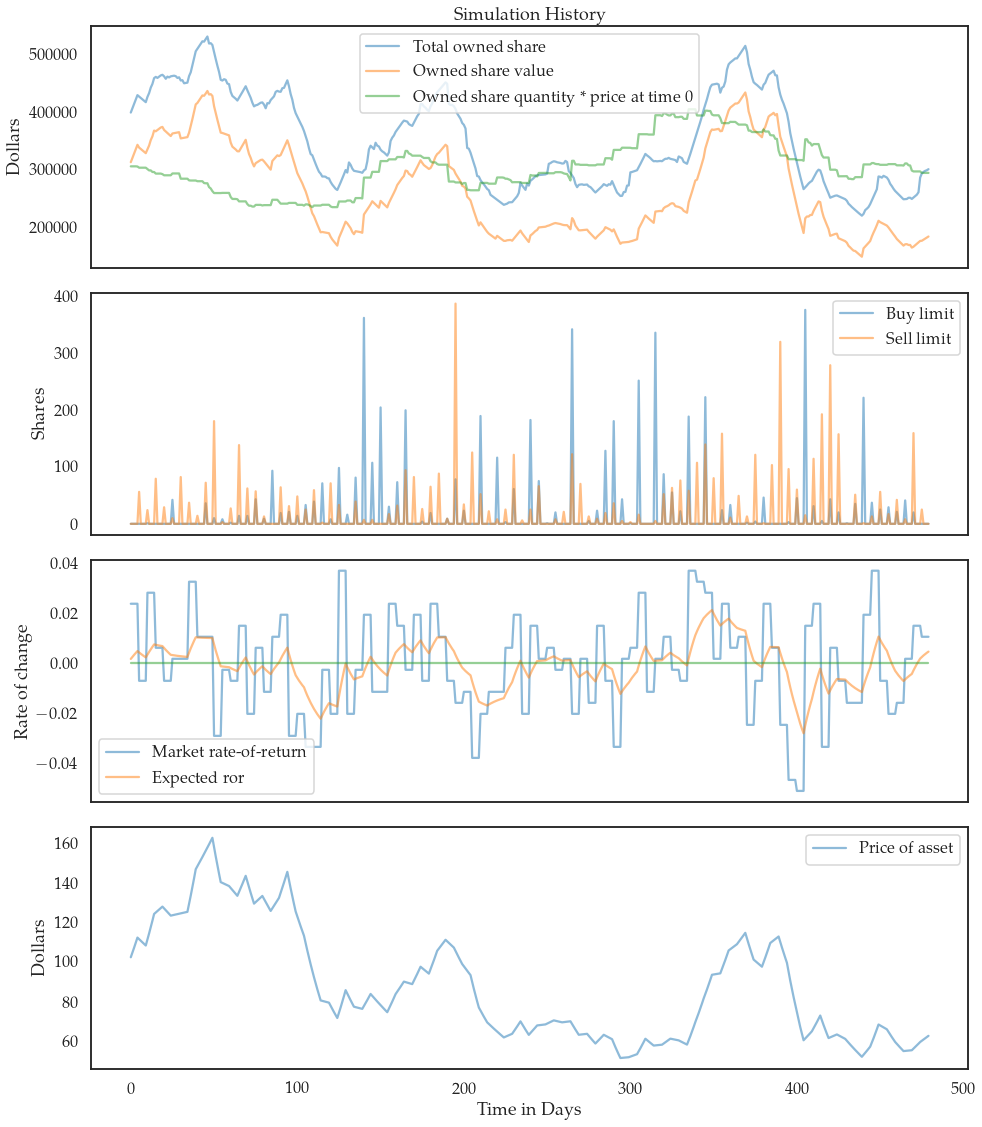

In [10]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(data['sell'], alpha=0.5, label='Sell limit')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()

